# **Chapter 9: Real-World Application: Data Preprocessing**

## Introduction to the Titanic Dataset  

- Widely used in data science for its mix of feature types.  
- Contains passenger information and survival outcome (`Survived`).  
- Key features:  
  - **Numerical**: `Age`, `Fare`  
  - **Categorical**: `Sex`, `Embarked`  
  - **Mixed**: `Cabin`  

### Preprocessing Techniques We'll Use:  
1. **Data Cleaning** – handle missing values (`Age`, `Cabin`, `Embarked`).  
2. **Data Transformation** – apply log transform to `Fare` (skewed).  
3. **Data Reduction** – drop irrelevant features like `PassengerId`.  
4. **Data Discretization** – bin `Age` into life stages.  
5. **Encoding** – convert categorical features (`Sex`, `Embarked`) using one-hot encoding.  

⚡ Reminder: Preprocessing is **iterative** — steps may need to be revisited and adjusted.  

## Step 1: Connect Google Colab to your Google Drive

In [1]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving train.csv to train.csv


## Step 2: Import the Necessary Libraries and Load the Data

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
# Load the dataset
data = pd.read_csv('train.csv')


In [5]:

# To get the first five rows of the dataset
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# To get a statistical summary of the dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# To get a brief overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Step 3: Defining Preprocessing Steps  

- **Data Cleaning**  
  - Handle missing values:  
    - `Age` → replace with **median**  
    - `Embarked`, `Sex` → replace with **"missing"**  

- **Encoding Categorical Features**  
  - Convert `Sex` and `Embarked` into numerical form using **one-hot encoding**  

- **Numerical Features** (`Age`, `Fare`)  
  - Imputation with **median**  
  - Apply **StandardScaler**  

- **Categorical Features** (`Embarked`, `Sex`, `Pclass`)  
  - Imputation with **"missing"**  
  - Apply **OneHotEncoder**  

In [9]:
# Preprocessing for numerical columns
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='median')),
('scaler', StandardScaler())])

In [10]:
# Preprocessing for categorical columns
categorical_features = ['Embarked', 'Sex', 'Pclass']
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
('onehot', OneHotEncoder(handle_unknown='ignore'))])

**Numerical Features (`Age`, `Fare`)**  
  - Fill missing values with **median**  
  - Apply **StandardScaler**  

**Categorical Features (`Embarked`, `Sex`, `Pclass`)**  
  - Fill missing values with **"missing"**  
  - Apply **OneHotEncoder**

## Step 4: Combining Preprocessing Steps
- Use **ColumnTransformer** to combine numerical and categorical pipelines  
- Ensures preprocessing is **systematic** and **replicable**

In [11]:
preprocessor = ColumnTransformer(
transformers=[
('num', numerical_transformer, numerical_features),
('cat', categorical_transformer, categorical_features)])

## The ColumnTransformer receives a list of tuples, where each tuple defines a name, a transformer, and the features to which the transformer should be applied.

## Step 5: Applying the Preprocessing Pipeline  
- Apply the pipeline to the dataset  
- Executes all defined **cleaning** and **transformation** steps  

In [13]:
# Fit and transform the data
titanic_preprocessed = preprocessor.fit_transform(data)

In [14]:
# Let's look at the preprocessed data
print(titanic_preprocessed)

[[-0.56573646 -0.50244517  0.         ...  0.          0.
   1.        ]
 [ 0.66386103  0.78684529  1.         ...  1.          0.
   0.        ]
 [-0.25833709 -0.48885426  0.         ...  0.          0.
   1.        ]
 ...
 [-0.1046374  -0.17626324  0.         ...  0.          0.
   1.        ]
 [-0.25833709 -0.04438104  1.         ...  1.          0.
   0.        ]
 [ 0.20276197 -0.49237783  0.         ...  0.          0.
   1.        ]]


## Data Reduction & Discretization  
- **Data Reduction**: Drop irrelevant features (e.g., `PassengerId`)  
- **Data Discretization**: Convert `Age` into bins representing life stages

In [16]:
# Data Discretization

bins = [0, 12, 50, 200]
labels = ['Child', 'Adult', 'Elderly']
data['Age'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Evaluation of Preprocessed Data  
- Dataset is now **cleaned, transformed, and ready for visualization**  
- Evaluate preprocessing quality before modeling using:  
    - **Data Quality Report**: Compare missing values &     distributions before vs. after  
    - **Visualizations**: Histograms, box plots, scatter plots  


# Analyzing the Preprocessed Data
Let's put the aforementioned evaluation techniques into practice.


## 1. Data Quality Report:


Let's compare the number of missing values before and after preprocessing.

In [21]:
# Convert preprocessed NumPy array to DataFrame
titanic_preprocessed_df = pd.DataFrame(
    titanic_preprocessed,
    columns=preprocessor.get_feature_names_out()
)

print("\nMissing values after preprocessing:")
print(titanic_preprocessed_df.isnull().sum())


Missing values after preprocessing:
num__Age                 0
num__Fare                0
cat__Embarked_C          0
cat__Embarked_Q          0
cat__Embarked_S          0
cat__Embarked_missing    0
cat__Sex_female          0
cat__Sex_male            0
cat__Pclass_1            0
cat__Pclass_2            0
cat__Pclass_3            0
dtype: int64


## If our preprocessing was successful, we should see a reduction in missing values.

## 2. Visualizations:

We can use plots to visualize changes in our data. For instance, we can plot the 'Age' distribution before and after discretization:

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([581.,   0.,   0.,   0.,   0.,  64.,   0.,   0.,   0.,  69.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

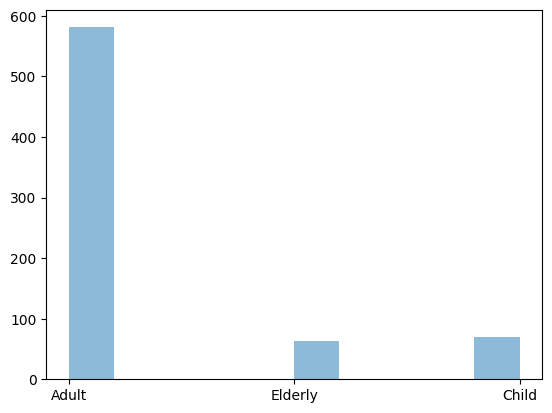

In [24]:
# Before discretization
plt.hist(data['Age'].dropna(), alpha=0.5, label='Before discretization')

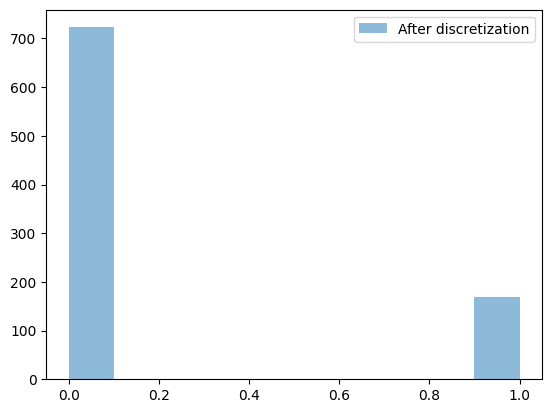

In [25]:
# After discretization
plt.hist(titanic_preprocessed[:,2], alpha=0.5, label='After discretization')
plt.legend()
plt.show()

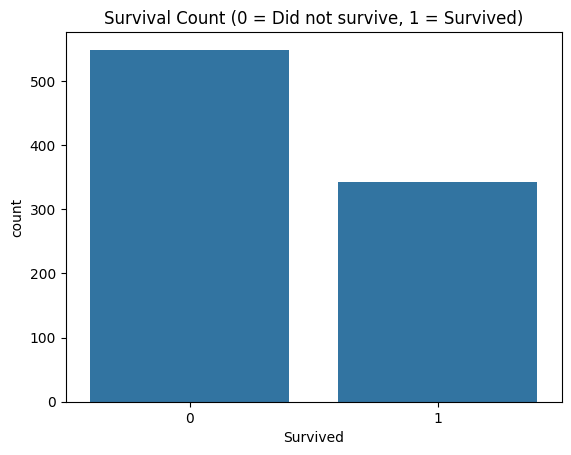

In [39]:
# Survival count plot
sns.countplot(x='Survived', data=data)
plt.title("Survival Count (0 = Did not survive, 1 = Survived)")
plt.show()

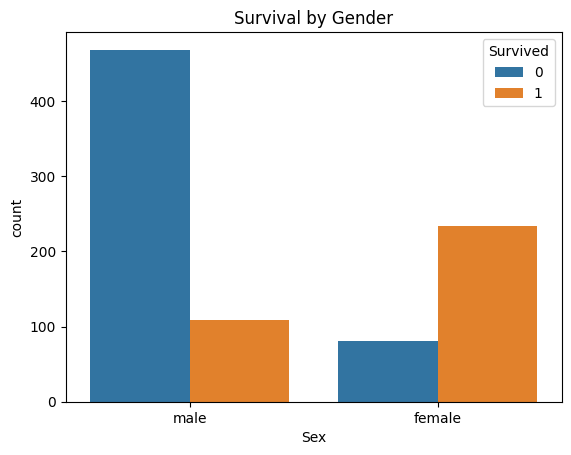

In [40]:
# Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title("Survival by Gender")
plt.show()

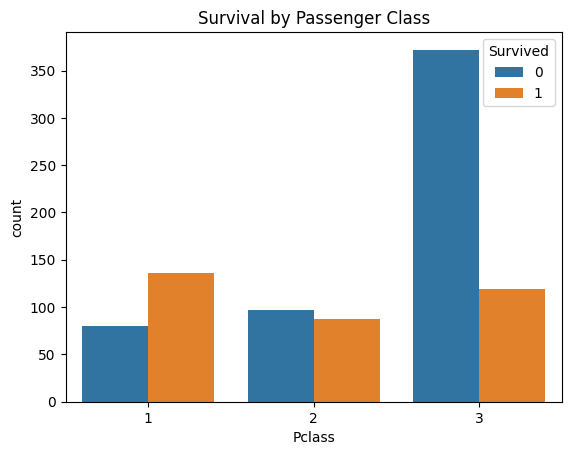

In [41]:
# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title("Survival by Passenger Class")
plt.show()

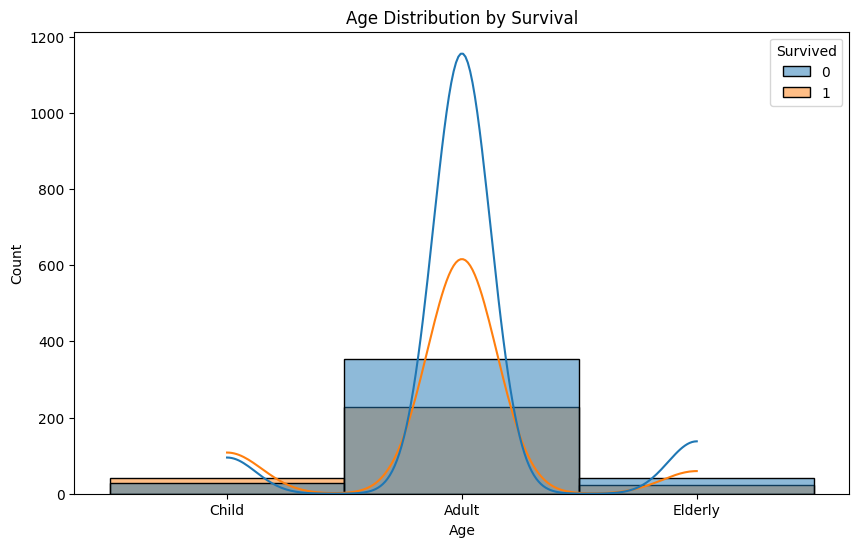

In [42]:
# Age Distribution of Survivors vs Non-Survivors
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()

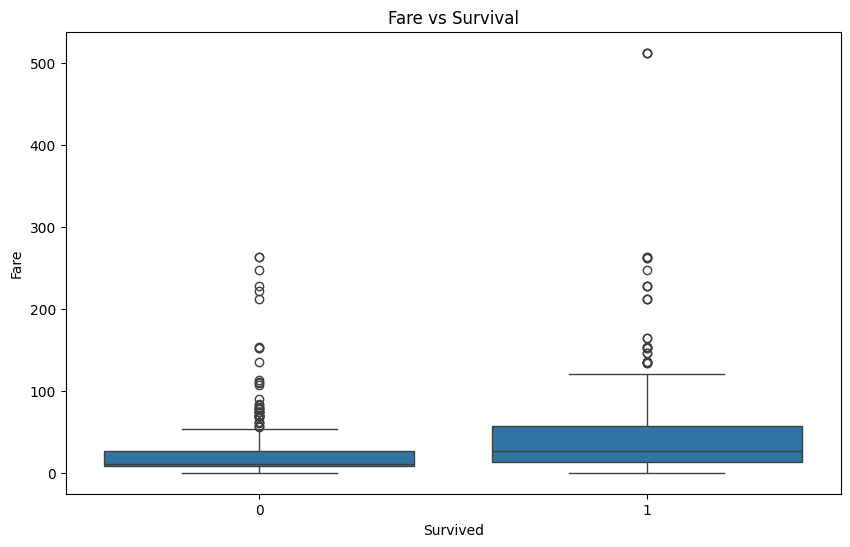

In [43]:
# Fare Distribution by Survival
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title("Fare vs Survival")
plt.show()

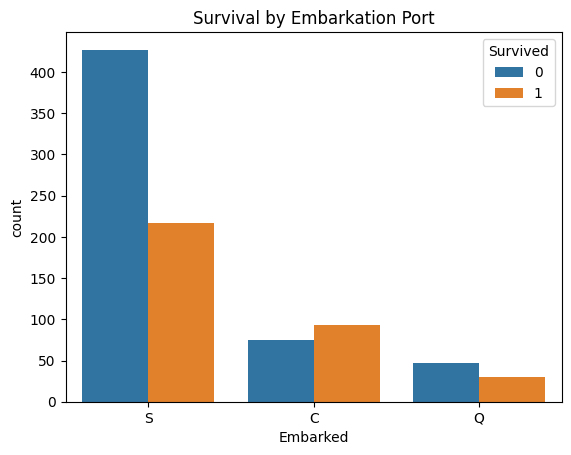

In [44]:
# Embarkation Port & Survival
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title("Survival by Embarkation Port")
plt.show()

Passengers who embarked from 'C' (Cherbourg) had a higher survival rate than those from 'S' (Southampton).

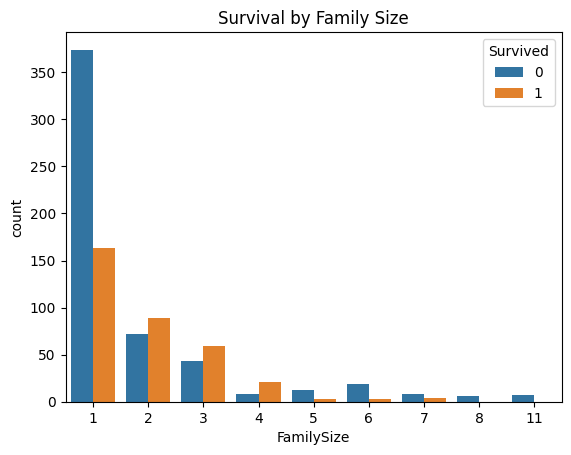

In [45]:
# Family Size Effect (SibSp + Parch)
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
sns.countplot(x='FamilySize', hue='Survived', data=data)
plt.title("Survival by Family Size")
plt.show()

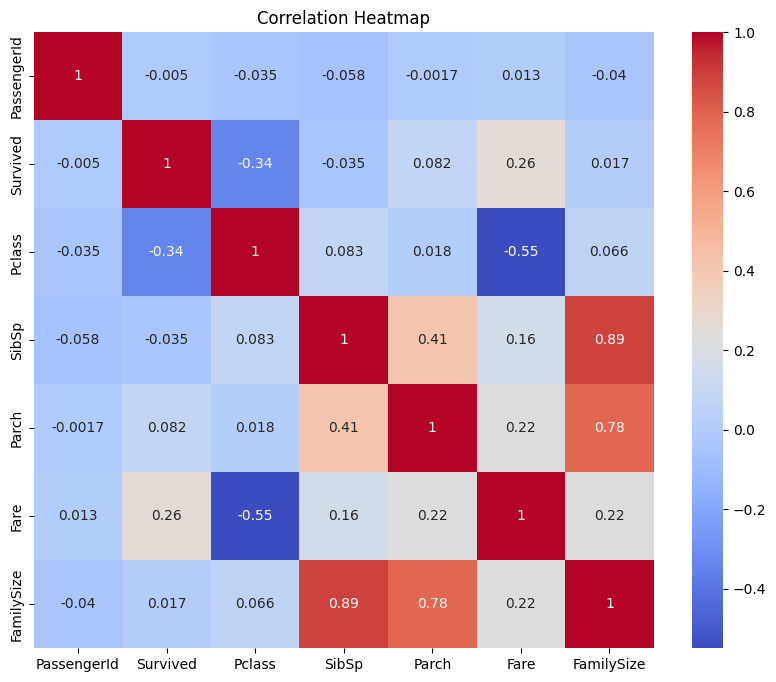

In [47]:
# Heatmap of Correlations (numeric columns only)
plt.figure(figsize=(10,8))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()